In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

In [20]:
dataset = pd.read_csv('../Social_Network_Ads.csv')
dataset.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [ ]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [45]:
dataset.shape

(400, 5)

In [22]:
dataset['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [23]:
x = dataset.iloc[:, 2:-1]
y = dataset['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [26]:
lr.score(x_test, y_test)* 100

88.75

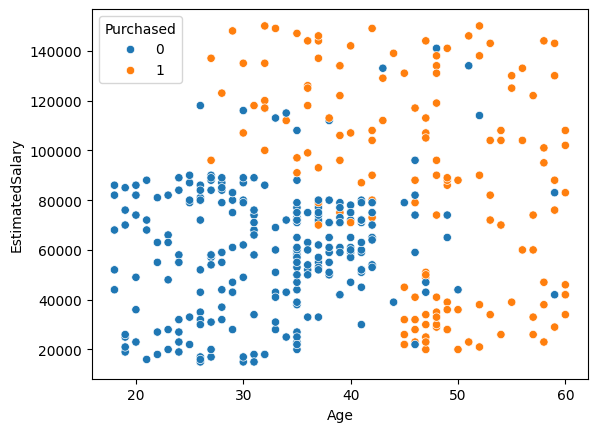

In [27]:
sns.scatterplot(x='Age', y='EstimatedSalary', data=dataset, hue='Purchased')
plt.show()

c:\Users\Prati\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


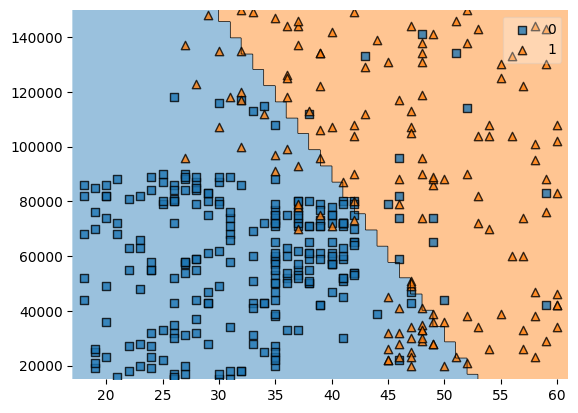

In [28]:
plot_decision_regions(X=x.to_numpy(), y=y.to_numpy(), clf=lr)
plt.show()

In [29]:
cm = confusion_matrix(y_test, lr.predict(x_test))
cm

array([[50,  2],
       [ 7, 21]])

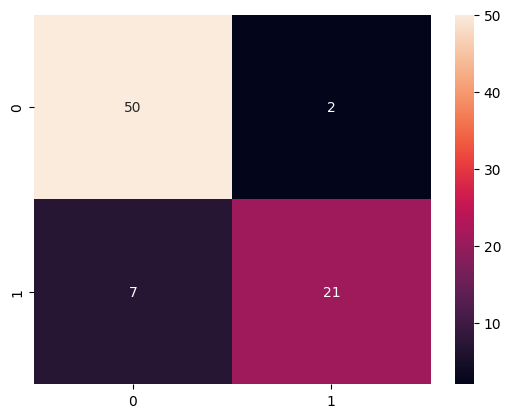

In [30]:
sns.heatmap(cm, annot=True)
plt.show()

In [31]:
f1_score(y_test, lr.predict(x_test)) * 100

82.35294117647058

In [32]:
precision_score(y_test, lr.predict(x_test)) * 100

91.30434782608695

In [33]:
recall_score(y_test, lr.predict(x_test)) * 100

75.0

In [34]:
# we use imblearn library to balance imbalanced here we either create duplicate of less data to match or we select that much of data from larger set to matches it with the low number set of data.

In [35]:
from imblearn.under_sampling import RandomUnderSampler

In [46]:
ru = RandomUnderSampler()
ru_x, ru_y = ru.fit_resample(x, y)
ru_x.shape

(286, 2)

In [47]:
ru_y.value_counts()

Purchased
0    143
1    143
Name: count, dtype: int64

In [48]:
# now you how to use this data to train the model and you do know that

In [49]:
from imblearn.over_sampling import RandomOverSampler

In [50]:
ro = RandomOverSampler()

In [51]:
ro_x, ro_y = ro.fit_resample(x, y)

In [52]:
ro_y.shape

(514,)

In [53]:
ro_y.value_counts()

Purchased
0    257
1    257
Name: count, dtype: int64

In [ ]:
# now you know how to train model with this data  